In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def f(x):
    return x**2 - 5*x + 2

In [7]:
x = np.linspace(-10, 10)
y = f(x)

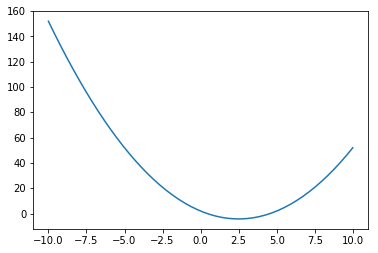

In [8]:
plt.plot(x, y)

In [14]:
T = 100
T0 = 0
x = 0

In [15]:
x_bar = 20 * np.random.rand()

In [16]:
delta_E = f(x_bar) - f(x)

In [17]:
np.exp(-delta_E/T)

0.32062215289247503

In [19]:
if delta_E < 0:
    x = x_bar
elif np.exp(-delta_E/T) < np.random.rand():
    x = x_bar

In [20]:
T -=1

0

In [35]:
def simulate_anneal(f, T=1000, T0=0, x0=0):
    x = x0
    while T > T0:
        x_bar = 20 * np.random.rand()
        delta_E = f(x_bar) - f(x)
        if delta_E < 0:
            x = x_bar
        elif np.random.rand() < np.exp(-delta_E/T):
            x = x_bar
        T -=1
    return x

In [38]:
simulate_anneal(f)

2.877980778131861

### Example

#### 模拟退火硬币实验
1. $\beta$($\beta=1/T$)：反温度
2. $\{\sigma_i\}$($\sigma_i \in \{-1, 1\}$, $i=1..N$): 硬币初始状态
3. $E=\sum_{i=1}^N \sigma_i$: 硬币总能量
4. 随机选择一个$i$, 尝试改变$i$硬币的状态$\sigma_i$：
$$\sigma_i \rightarrow -\sigma_i$$
$$E \rightarrow E'$$
$$\Delta E = E' - E$$
5. 以$P_{flip}=min\{1, e^{-\beta \Delta E}\}$的概率翻转硬币$i$
6. 重复4，5直到$\beta$增加到给定的$\beta_{final}$

In [56]:
N=100 #100个硬币

In [57]:
beta = 0.1

In [58]:
sigma = np.random.randint(0, 2, size=N)

In [59]:
sigma

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [60]:
sigma[sigma==0] = -1

In [61]:
sigma

array([-1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1])

In [62]:
E = sigma.sum()

In [63]:
E

-2

In [64]:
index = np.random.choice(range(N))

In [65]:
index

8

In [66]:
sigma_c = sigma.copy()
sigma_c[index] = -sigma_c[index]
E_bar = sigma_c.sum()
delta_E = E_bar - E
delta_E

2

In [67]:
p_flip = np.min([1, np.exp(-beta*delta_E)])
p_flip

0.8187307530779818

In [68]:
if np.random.rand() < p_flip:
    sigma = sigma_c.copy()

In [69]:
sigma

array([-1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1])

In [72]:
def simulate_anneal_coin(N=100, n_iter=int(1e3), beta=0.1, betaF=0.5):
    sigma = np.random.randint(0, 2, size=N)
    sigma[sigma==0] = -1
    for _ in range(n_iter):
        E = sigma.sum()
        index = np.random.choice(range(N))
        sigma_c = sigma.copy()
        sigma_c[index] = -sigma_c[index]
        E_bar = sigma_c.sum()
        delta_E = E_bar - E
        p_flip = np.min([1, np.exp(-beta*delta_E)])
        if np.random.rand() < p_flip:
            sigma = sigma_c.copy()
        beta += 0.02
        if beta == betaF:
            break
    return sigma

In [73]:
simulate_anneal_coin()

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])